In [1]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import random
import cv2
import numpy as np
import json
import os
random.seed(0)
num_classes = 8
colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(num_classes)]

In [9]:
#filename = 'data/teacher_pairs.odgt'
#filename = 'data/AllSeqsWithOneAnn2beCleaned_labeled.uniq.odgt.labeled_relevent'
filename = 'datasets/plant_dataset/plant_pairs.odgt'
with open(filename, 'r') as f:
    data = f.readlines()

In [3]:
        
# show pairs orgs and seg
def display(start, end, data, colors):
    for i in range(start, end):
        display_pair(data[i], colors)
        

def color_image(path, colors):
    if os.path.isfile(path):
        img = cv2.imread(path)
        for i in range(len(colors)):
            img[:,:,0][np.where(img[:,:,0] == i)] = colors[i][0]
            img[:,:,1][np.where(img[:,:,1] == i)] = colors[i][1]
            img[:,:,2][np.where(img[:,:,2] == i)] = colors[i][2]
        return img

# resize img to dsize (shape[1], shape[0])
def reszie_img(img, dsize):
    # dsize = (int(labeled_img.shape[1]), int(labeled_img.shape[0]))
    return cv2.resize(img, dsize)


# Display a pair of image and label
# resizing 
# 1. Resize seq unlabel image (easiest way)
def display_pair(data_line, color_map, resize=True):

    tmp_json = json.loads(data_line)

    labeled_img = cv2.imread(tmp_json['fpath_img'][0])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)
    colored_seg = color_image(tmp_json['fpath_segm'][0], color_map)

    unlabeled_img = cv2.imread(tmp_json['fpath_img'][1])
    unlabeled_img = cv2.cvtColor(unlabeled_img, cv2.COLOR_BGR2RGB)
    
 
    if resize: 
        unlabeled_img = reszie_img(unlabeled_img, (int(labeled_img.shape[1]), int(labeled_img.shape[0])))
    
    colored_seg2 = color_image(tmp_json['fpath_segm'][1], color_map)
    

    
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0][0].imshow(labeled_img)
    axs[0][0].set_title("labeled")
    
    axs[0][1].imshow(colored_seg)
    
    axs[1][0].imshow(unlabeled_img)
    axs[1][0].set_title("raw (resized)")
    
    axs[1][1].imshow(colored_seg2)
    plt.tight_layout()
    plt.show();

647


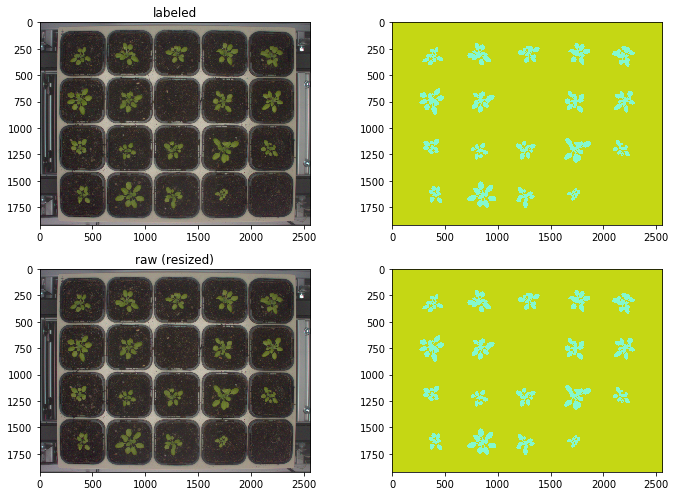

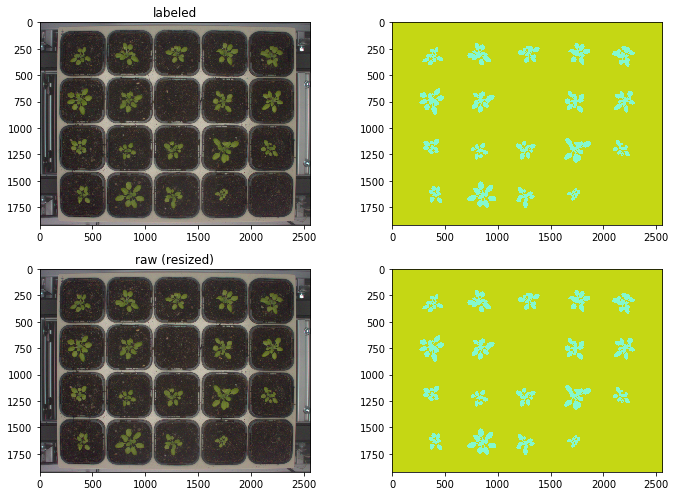

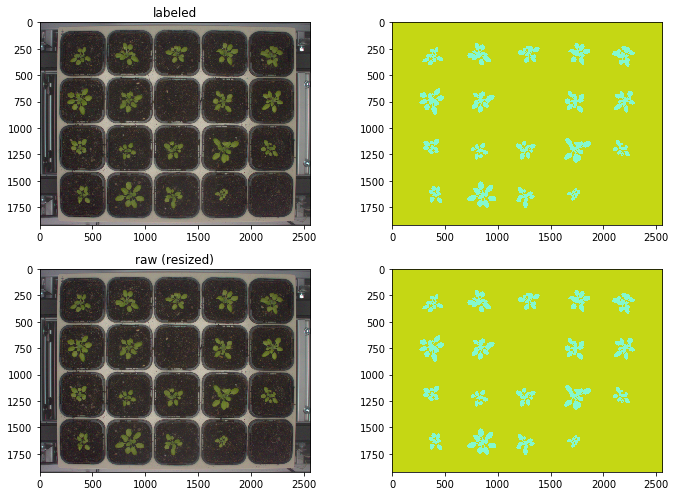

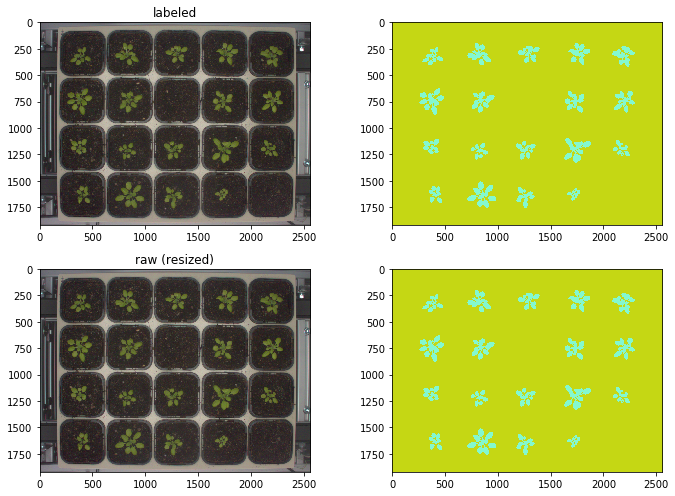

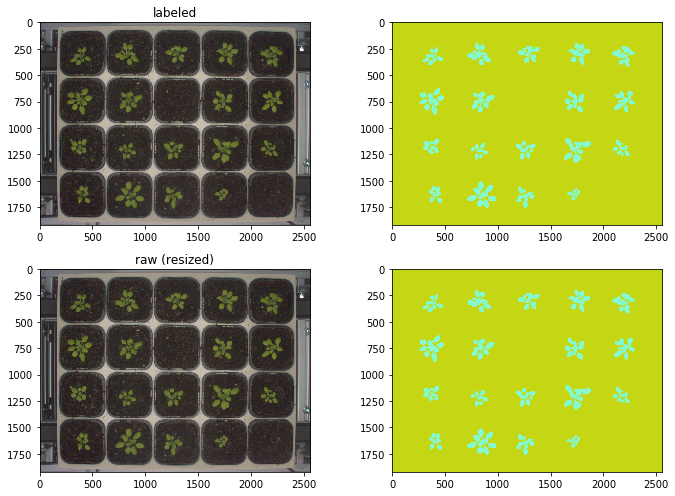

In [4]:
a = random.randint(0, len(data))
print(a) #5473
display(a, a+5, data, colors)

## plant data

In [5]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import random
import cv2
import numpy as np
import json

random.seed(0)
num_classes = 51
colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(num_classes)]

In [61]:
def color_img(paths):
    if type(paths) is str:
        paths = [paths]
        
    for path in paths:
        img = cv2.imread(path) # this is the annotation
        try:
            for i in range(len(colors)):
                img[:,:,0][np.where(img[:,:,0] == i)] = colors[i][0]
                img[:,:,1][np.where(img[:,:,1] == i)] = colors[i][1]
                img[:,:,2][np.where(img[:,:,2] == i)] = colors[i][2]
            
            plt.imshow(img)
            plt.show()
        except:
            pass
        
def color_seg(img):
    for i in range(len(colors)):
        if i==0: continue
        img[:,:,0][np.where(img[:,:,0] == i)] = colors[i][0]
        img[:,:,1][np.where(img[:,:,1] == i)] = colors[i][1]
        img[:,:,2][np.where(img[:,:,2] == i)] = colors[i][2]
    return img
        
def display(start, end, data):
    for i in range(start,end):
        print(i)
        color_img(json.loads(data[i])['fpath_img'])
        color_img(json.loads(data[i])['fpath_segm'])

In [62]:
# filename = '/data/sara/semantic-segmentation-pytorch/plant_dataset/plant_pairs.odgt'
with open(filename, 'r') as f:
    data = f.readlines()

In [84]:
img_index1 = 0
img0a = cv2.imread(json.loads(data[img_index1])['fpath_img'][0])
img0b = cv2.imread(json.loads(data[img_index1])['fpath_img'][1])

seg0a = color_seg(cv2.imread(json.loads(data[img_index1])['fpath_segm'][0]))
seg0b = color_seg(cv2.imread(json.loads(data[img_index1])['fpath_segm'][1]))

img1 = np.concatenate((img0a, img0b), axis=1)
#seg1 = np.concatenate((seg0a, seg0b), axis=0)
#img1 = np.concatenate((img1, seg1), axis=1)


img_index2 = 300
img0a = cv2.imread(json.loads(data[img_index2])['fpath_img'][0])
img0b = cv2.imread(json.loads(data[img_index2])['fpath_img'][1])

seg0a = color_seg(cv2.imread(json.loads(data[img_index2])['fpath_segm'][0]))
seg0b = color_seg(cv2.imread(json.loads(data[img_index2])['fpath_segm'][1]))

img2 = np.concatenate((img0a, img0b), axis=1)
#seg2 = np.concatenate((seg0a, seg0b), axis=0)
#img2 = np.concatenate((img2, seg2), axis=1)


img_index3 = 700
img0a = cv2.imread(json.loads(data[img_index3])['fpath_img'][0])
img0b = cv2.imread(json.loads(data[img_index3])['fpath_img'][1])

seg0a = color_seg(cv2.imread(json.loads(data[img_index3])['fpath_segm'][0]))
seg0b = color_seg(cv2.imread(json.loads(data[img_index3])['fpath_segm'][1]))

img3 = np.concatenate((img0a, img0b), axis=1)
#seg3 = np.concatenate((seg0a, seg0b), axis=0)
#img3 = np.concatenate((img3, seg3), axis=1)

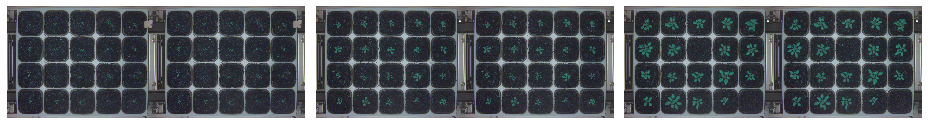

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(13, 9))

axs[0].imshow(img1)
# axs[0].set_title("")
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].set_title("")
axs[1].axis('off')

axs[2].imshow(img3)
axs[2].set_title("")
axs[2].axis('off')

plt.tight_layout()

plt.savefig('data/plants_seqs3.png')
plt.show();

In [18]:
a = random.randint(0, len(data))
display(a,a+0, data)

## Davis data

In [ ]:
filename = '/data/sara/frtm-vos/DAVIS_MIT-SEG/test.odgt'
with open(filename, 'r') as f:
    data = f.readlines()

In [ ]:
a = random.randint(0, len(data)-1)
dict = json.loads(data[a])
label = cv2.imread(dict['fpath_segm'])
print(np.unique(label))
display(a,a+1, data)